In [16]:
# Librairires utiles
import pandas
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+ Travail de Machine Learning avec un sujet issu de Kaggle : correctly identify digits from a dataset of tens of thousands of handwritten images.
+ Pour ça on dispose de 3 bases : train (complète sur laquelle on construit nos modèles ML), test (appliquer modèle fait à partir du train sur test pour identifier les digits), et sample_submission.
+ Le modèle construit sera sans biais car le test ne sera pas fait sur le même échantillon que l'apprentissage.

# Import des bases

### Base 'test'

In [2]:
test = pandas.read_csv("test.csv", sep=",", encoding='latin1')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Nom des variables
list(test.columns)

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [4]:
# Dimensions
test.shape

(28000, 784)

### Base 'train' avec la variable "survived", dit donnes d'apprentissage

In [5]:
train = pandas.read_csv("train.csv", sep=",", encoding='latin1')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Dimensions
train.shape

(42000, 785)

In [7]:
train.count()

label       42000
pixel0      42000
pixel1      42000
pixel2      42000
pixel3      42000
            ...  
pixel779    42000
pixel780    42000
pixel781    42000
pixel782    42000
pixel783    42000
Length: 785, dtype: int64

### Base 'sample_submission' avec seulement les femmes ayant survécu

In [8]:
sample_submission = pandas.read_csv("sample_submission.csv", sep=",", encoding='latin1')
sample_submission.head(7)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0


# Analyse sur la base 'train'

### Statistiques descriptives

In [9]:
train.describe().round(decimals=1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0
mean,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.3,4.6,3.3,1.8,1.9,0.4,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,254.0,253.0,253.0,254.0,62.0,0.0,0.0,0.0,0.0


In [10]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [11]:
stats_train = pandas_profiling.ProfileReport(train)
stats_train

KeyboardInterrupt: 

<AxesSubplot:xlabel='label', ylabel='count'>

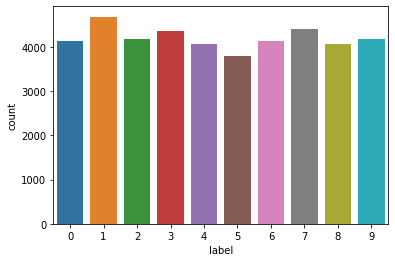

In [15]:
sns.countplot(x = 'label' , data = train)

# Comparaison régression logistique et SVN

+ Reg logistique : peu de risque de sur-apprentissage
+ 

### Définition du knn (k plus proche voisin)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
knn=KNeighborsClassifier(n_neighbors=30)
#On entraîne le modèle :
knn.fit(Xtrain, Ytrain)
pred_test=knn.predict(Xtest)
#Evaluer le modèle en utilisant le taux d'erreur :
err_test30=np.sum(Ytest != pred_test)/len(Ytest)
#Evaluer le modèle en utilisant le score :
knn.score(Xtest, Ytest)
#Matrice de confusion :
matrix_confusion = confusion_matrix(Ytest, pred_test)